In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('fivethirtyeight')

План на курсовую  
1) библиотеки  
2) данные  
3) исследование  
4) очистка данных  
5) выбрать модель  
6) подбор параметров гридсерч  
7) результат  

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
data.loc[data['HouseYear']==20052011, 'HouseYear']=2008
data.loc[data['HouseYear']==4968, 'HouseYear']=1968

In [6]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [7]:
scaler = MinMaxScaler()

In [8]:
train_scaled = scaler.fit_transform(train.loc[:, ['HouseYear', 'DistrictId']])

/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
train_scaled

array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [10]:
inertia_arr=[]
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=10)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.34653985063
89.93815634345562
75.4878225357024
63.44980601799889
56.390049259308356
50.1381026040667


Text(0.5, 1.0, 'Inertia')

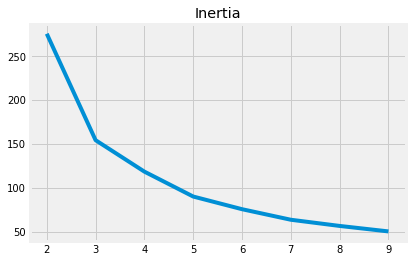

In [11]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Inertia')

In [12]:
# 5 - is OK

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model=AgglomerativeClustering(n_clusters=5)

In [15]:
train['cluster_year']=model.fit_predict(train_scaled)

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Train')

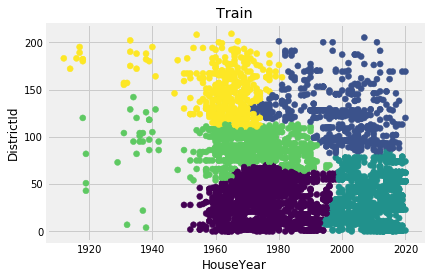

In [16]:
plt.scatter(train['HouseYear'], train['DistrictId'], c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('Train')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 21 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
cluster_year     7000 non-null int64
dtypes: float64(8), int64(10), object(3)
memory usage: 1.2+ MB


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(train_scaled, train['cluster_year'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
valid_scaled = scaler.transform(valid.loc[:, ['HouseYear', 'DistrictId']])

In [22]:
valid['cluster_year'] = knn.predict(valid_scaled)

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


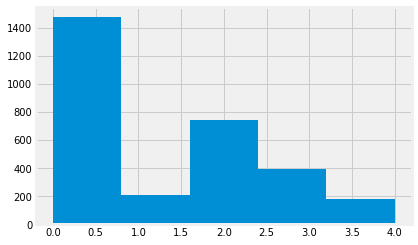

In [23]:
valid['cluster_year'].hist(bins=5)

Text(0.5, 1.0, 'Valid')

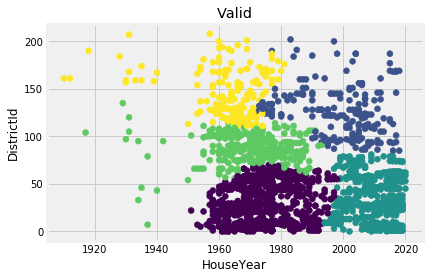

In [24]:
plt.scatter(valid['HouseYear'], valid['DistrictId'], c=valid['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('Valid')

In [25]:
distr_info = train['DistrictId'].value_counts().reset_index().rename(columns={'DistrictId': 'large_district', 'index': 'DistrictId'})

In [26]:
distr_info.head()

,DistrictId,large_district
0,27,574
1,1,466
2,23,394
3,6,355
4,9,222


In [27]:
distr_info['is_large'] = (distr_info['large_district']>100).astype(int)

In [28]:
distr_info.head()

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1


In [29]:
distr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


In [30]:
def add_distr_info(df, distr_info):
    df = pd.merge(df, distr_info, on='DistrictId', how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district'] = df['large_district'].fillna(1)
    return df

In [31]:
price = train['Price'].mean()
price

214449.1673897029

In [32]:
price_mean_by_room = train.groupby(['Rooms'], as_index=False).agg({'Price': 'mean'}).rename(columns={'Price': 'mean_price_by_rooms'})
price_mean_by_room

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291
5,5.0,386743.536446
6,6.0,229661.964416
7,10.0,317265.323792
8,19.0,78364.616704


In [33]:
price_mean_by_distr_rooms = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'mean'}).rename(columns={'Price': 'mean_price_by_dr'})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [34]:
def add_mean_price(df, price_mean_by_rooms, price_mean_by_distr_rooms, price):
    df = pd.merge(df, price_mean_by_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, price_mean_by_rooms, on='Rooms', how='left')
    df['mean_price_by_dr'] = df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr'] = df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms'] = df['mean_price_by_rooms'].fillna(price)
    return df

In [35]:
def dummies(df, cluster_year='cluster_year'):
    df[cluster_year] = df[cluster_year].astype(object)
    df = pd.get_dummies(df)
    return df

In [36]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,B,6,1437,3,NaN,0,2,B,88504.384965,2
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,...,B,2,475,0,NaN,0,0,B,207007.956663,0
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,B,43,7227,0,NaN,1,6,A,182126.280899,3
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,...,B,46,9515,5,NaN,1,10,B,524365.550705,2
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,B,16,4048,3,NaN,1,3,B,322048.433990,3


In [37]:
train = add_distr_info(train, distr_info)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year,large_district,is_large
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,1437,3,NaN,0,2,B,88504.384965,2,394,1
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,...,475,0,NaN,0,0,B,207007.956663,0,394,1
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,7227,0,NaN,1,6,A,182126.280899,3,21,0
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,...,9515,5,NaN,1,10,B,524365.550705,2,62,0
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,4048,3,NaN,1,3,B,322048.433990,3,28,0


In [38]:
train = add_mean_price(train, price_mean_by_room, price_mean_by_distr_rooms, price)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year,large_district,is_large,mean_price_by_dr,mean_price_by_rooms
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,NaN,0,2,B,88504.384965,2,394,1,102427.030975,160134.810901
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,...,NaN,0,0,B,207007.956663,0,394,1,165911.129700,290867.452543
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,NaN,1,6,A,182126.280899,3,21,0,169596.630515,160134.810901
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,...,NaN,1,10,B,524365.550705,2,62,0,382424.639356,290867.452543
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,NaN,1,3,B,322048.433990,3,28,0,251751.766701,290867.452543


In [39]:
train = dummies(train)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,1,0,1,0,1,0,0,1,0,0
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,...,1,0,1,0,1,1,0,0,0,0
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,1,0,1,1,0,0,0,0,1,0
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,...,1,0,1,0,1,0,0,1,0,0
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,1,0,1,0,1,0,0,0,1,0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 32 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Price                  7000 non-null float64
large_district         7000 non-null int64
is_large               7000 non-null int64
mean_price_by_dr       7000 non-null float64
mean_price_by_r

In [41]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'cluster_year_4'],
      dtype='object')

In [48]:
feats = ['cluster_year_0', 'cluster_year_1', 'cluster_year_2', 'cluster_year_3', 'cluster_year_4', 
         'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms']

In [49]:
from sklearn.ensemble import RandomForestRegressor as RF

In [50]:
model = RF(n_estimators=40, max_depth=10, random_state=42)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 32 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Price                  7000 non-null float64
large_district         7000 non-null int64
is_large               7000 non-null int64
mean_price_by_dr       7000 non-null float64
mean_price_by_r

In [51]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
valid=add_distr_info(valid, distr_info)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year,large_district,is_large
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,5487,3,NaN,0,4,B,181530.459031,0,107.0,1.0
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,4048,3,NaN,1,3,B,260456.004692,3,85.0,0.0
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,...,1564,0,540.0,0,0,B,219945.304640,0,355.0,1.0
3,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,...,168,0,NaN,0,0,B,66883.280318,0,394.0,1.0
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,...,7065,1,750.0,2,5,B,114086.065201,0,96.0,0.0


In [53]:
valid = add_mean_price(valid, price_mean_by_room, price_mean_by_distr_rooms, price)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,cluster_year,large_district,is_large,mean_price_by_dr,mean_price_by_rooms
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,NaN,0,4,B,181530.459031,0,107.0,1.0,189591.187596,215287.628931
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,NaN,1,3,B,260456.004692,3,85.0,0.0,293153.148921,290867.452543
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,...,540.0,0,0,B,219945.304640,0,355.0,1.0,212694.797384,290867.452543
3,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,...,NaN,0,0,B,66883.280318,0,394.0,1.0,102427.030975,160134.810901
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,...,750.0,2,5,B,114086.065201,0,96.0,0.0,135270.547115,160134.810901


In [54]:
valid = dummies(valid)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,1,0,1,0,1,1,0,0,0,0
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,1,0,1,0,1,0,0,0,1,0
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,...,1,0,1,0,1,1,0,0,0,0
3,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,...,1,0,1,0,1,1,0,0,0,0
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,...,1,0,1,0,1,1,0,0,0,0


In [55]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 32 columns):
Id                     3000 non-null int64
DistrictId             3000 non-null int64
Rooms                  3000 non-null float64
Square                 3000 non-null float64
LifeSquare             2373 non-null float64
KitchenSquare          3000 non-null float64
Floor                  3000 non-null int64
HouseFloor             3000 non-null float64
HouseYear              3000 non-null int64
Ecology_1              3000 non-null float64
Social_1               3000 non-null int64
Social_2               3000 non-null int64
Social_3               3000 non-null int64
Healthcare_1           1560 non-null float64
Helthcare_2            3000 non-null int64
Shops_1                3000 non-null int64
Price                  3000 non-null float64
large_district         3000 non-null float64
is_large               3000 non-null float64
mean_price_by_dr       3000 non-null float64
mean_price_

In [57]:
y_pred = model.predict(valid.loc[:, feats])
y_pred

array([185703.24288606, 281953.3399122 , 215322.67491006, ...,
       240102.49485683, 125870.00250298, 242212.36203131])

In [58]:
from sklearn.metrics import r2_score as r2
r2(valid['Price'], y_pred)

0.5589030137165744

In [59]:
# bad bad bad 

In [60]:
test_scaled = scaler.transform(test.loc[:, ['HouseYear', 'DistrictId']])

In [61]:
test['cluster_year'] = knn.predict(test_scaled)

In [62]:
test = add_distr_info(test, distr_info)

In [63]:
test = add_mean_price(test, price_mean_by_room, price_mean_by_distr_rooms, price)

In [64]:
test = dummies(test)

In [65]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,0,1,0,1,1,0,0,0,0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,1,0,1,0,1,0,0,0,1,0
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,1,0,1,0,1,0,0,0,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,1,0,1,0,1,0,0,1,0,0
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,0,1,1,0,0,0,1,0,0


In [67]:
test['Price'] = model.predict(test.loc[:, feats])

In [69]:
test.loc[:, ['Id', 'Price']]

,Id,Price
0,725,165397.506250
1,15856,233190.333972
2,5480,154233.050256
3,15664,178751.387621
4,14275,125535.226395
5,7633,199814.111253
6,13329,137174.300195
7,5502,220089.035732
8,4220,308428.795532
9,11538,210184.090448


In [70]:
#to_csv IPankov_predictions.csv index=None